#YCBS258

##Assignment #1

Vincent Roy
ID : 119244546



    Step 1 - Import boston dataset from keras
    Step 2 - Train / Test split - already done by keras. just print the shape
    Step 3 - Explore data - just print it
    Step 4 - Normalize the X values using sklearn
    Step 5 - Create custom activation function (sigmoid or tanh or something else)
    Step 6 - Create custom initializer (Uniform or Normal or something else)
    Step 7 - Create custom loss (MSE, RMSE or something else)
    Step 8 - Train your model using your custom functions
    Step 9 - Visualize the history of your training




In [1]:
# upgrade the tensorflow library
!pip install --upgrade tensorflow 

     |████████████████████████████████| 86.3MB 40kB/s 
     |████████████████████████████████| 450kB 47.5MB/s 
     |████████████████████████████████| 3.8MB 63.0MB/s 
     |████████████████████████████████| 81kB 8.1MB/s 
ERROR: tensorboard 2.0.1 has requirement grpcio>=1.24.3, but you'll have grpcio 1.15.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement google-auth~=1.4.0, but you'll have google-auth 1.6.3 which is incompatible.
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: google-auth 1.4.2
    Uninstalling google-auth-1.4.2:
      Successfully uninstalled google-auth-1.4.2
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow 1.15.0
    Uninstalling tensorflow-1.15.0:
      Successfully uninstalled

In [1]:
# import all of the required libraries
import tensorflow as tf

from keras.datasets import boston_housing
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets import mnist
from keras import backend as K

import matplotlib.pyplot as plt

import math

import numpy as np
import pandas as pd

import seaborn as sns
sns.set(style="ticks", color_codes=True)

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score as r2

tf.__version__

Using TensorFlow backend.


'2.0.0'

###Step 1 - Import boston dataset from keras
###Step 2 - Train / Test split - already done by keras. just print the shape


In [ ]:
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

###Step 3 - Explore data - just print it

In [ ]:
# convert the training features and add the traget data to a dataframe for exploration
data = pd.DataFrame(X_train)
data['target'] = y_train

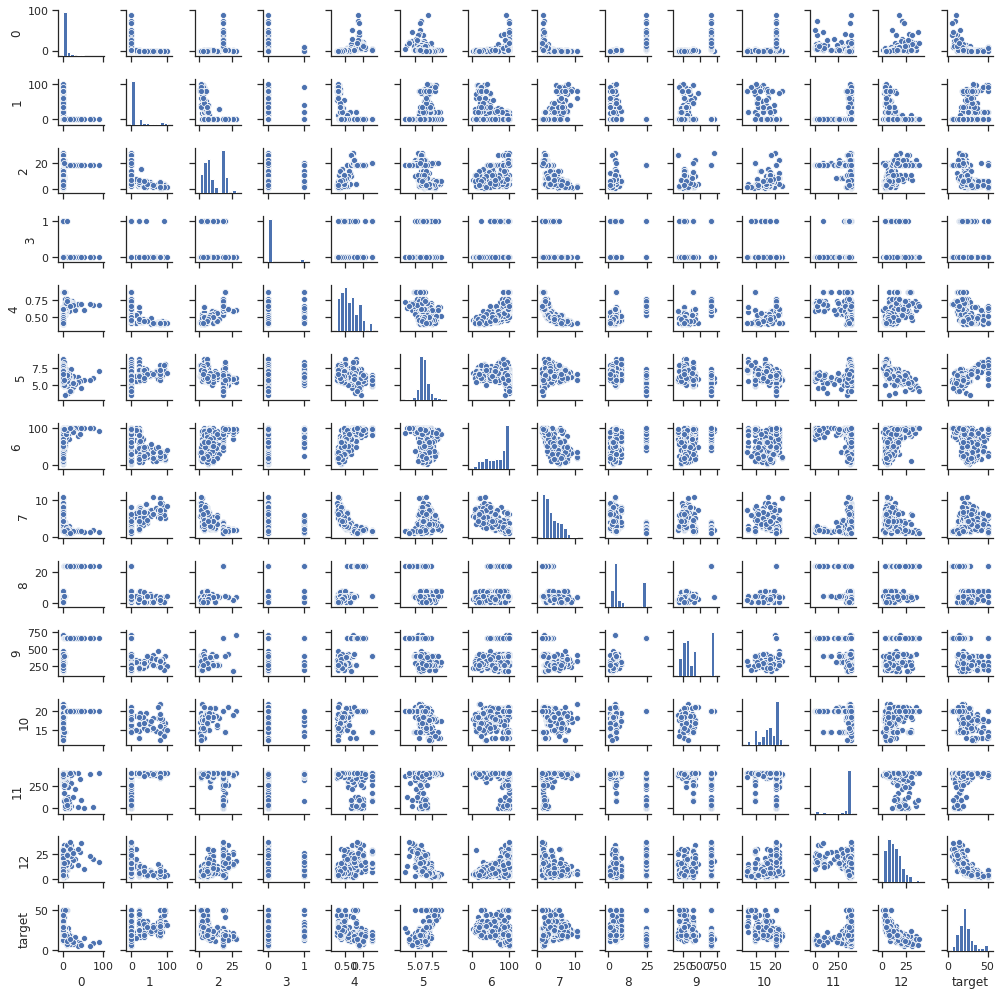

In [31]:
# do a matrix plot of the training data to see relationships
sns.pairplot(data,height=1)

<Figure size 360x360 with 0 Axes>

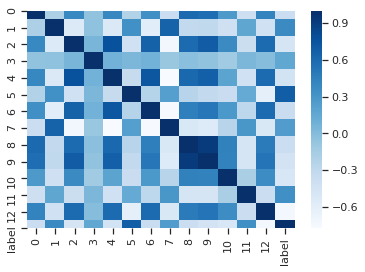

In [9]:
# get the correlation matrix for all of the data
cor = data.corr()

# plot the correlation matrix
plt.figure(figsize=(5,5));
fig, ax = plt.subplots();
sns.heatmap(cor,cmap="Blues");

In [32]:
# get the statistics on the features and target
data.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,target
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.745111,11.480198,11.104431,0.061881,0.557356,6.267082,69.010644,3.740271,9.440594,405.898515,18.475990,354.783168,12.740817,22.395050
std,9.240734,23.767711,6.811308,0.241238,0.117293,0.709788,27.940665,2.030215,8.698360,166.374543,2.200382,94.111148,7.254545,9.210442
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,188.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081437,0.000000,5.130000,0.000000,0.453000,5.874750,45.475000,2.077100,4.000000,279.000000,17.225000,374.672500,6.890000,16.675000
50%,0.268880,0.000000,9.690000,0.000000,0.538000,6.198500,78.500000,3.142300,5.000000,330.000000,19.100000,391.250000,11.395000,20.750000
75%,3.674808,12.500000,18.100000,0.000000,0.631000,6.609000,94.100000,5.118000,24.000000,666.000000,20.200000,396.157500,17.092500,24.800000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


###Step 4 - Normalize the X values using sklearn

In [33]:
# use MinMaxScaler to fit a scaler object
scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [ ]:
# min max scale the training and test set  
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

###Step 5 - Create custom activation function (sigmoid or tanh or something else)

In [3]:
# custon tanh activation function
def my_tanh(z):
  return ((tf.exp(z)-tf.exp(-z))/(tf.exp(z)+tf.exp(-z)))

###Step 6 - Create custom initializer (Uniform or Normal or something else)

In [4]:
# custom uniform initializer
def my_uniform(shape, dtype=tf.float32):
  return tf.random.uniform(shape, minval=-1, maxval=1, dtype=tf.float32)

###Step 7 - Create custom loss (MSE, RMSE or something else)

In [5]:
# custom mse loss function
def my_mseLoss(y_true,y_pred):
  return tf.square(y_true-y_pred)/2

###Bonus step - Create a custom metric function

In [6]:
# custom metric function to calculate the coefficion of dertermination R2
def my_coeffDetermination(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true-y_pred )) 
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) ) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

###Step 8 - Train your model using your custom functions

In [7]:
# create the MLP model
inputs = keras.Input(shape=(250000,))
hidden1 = Dense(50,activation=my_tanh,kernel_initializer=my_uniform)(inputs)
hidden2 = Dense(12,activation='relu',kernel_initializer=my_uniform)(hidden1)
hidden3 = Dense(12,activation='relu',kernel_initializer=my_uniform)(hidden2)
output = Dense(1,kernel_initializer='normal')(hidden3)
model = keras.Model(inputs,output)

# comile the model
model.compile(optimizer='adam',loss=my_mseLoss,metrics=['mae',my_coeffDetermination])

In [9]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 250000)]          0         
_________________________________________________________________
dense (Dense)                (None, 50)                12500050  
_________________________________________________________________
dense_1 (Dense)              (None, 12)                612       
_________________________________________________________________
dense_2 (Dense)              (None, 12)                156       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 13        
Total params: 12,500,831
Trainable params: 12,500,831
Non-trainable params: 0
_________________________________________________________________


In [44]:
# train the model on the training data
history = model.fit(X_train,y_train,epochs=100,batch_size=16)

Train on 404 samples
Epoch 1/100
404/404 [==============================] - 0s 1ms/sample - loss: 284.3526 - mae: 22.0041 - my_coeffDetermination: -7.7318
Epoch 2/100
404/404 [==============================] - 0s 125us/sample - loss: 267.6554 - mae: 21.2275 - my_coeffDetermination: -8.3208
Epoch 3/100
404/404 [==============================] - 0s 127us/sample - loss: 240.3671 - mae: 19.8744 - my_coeffDetermination: -6.1437
Epoch 4/100
404/404 [==============================] - 0s 118us/sample - loss: 195.2082 - mae: 17.4318 - my_coeffDetermination: -5.3574
Epoch 5/100
404/404 [==============================] - 0s 123us/sample - loss: 131.8883 - mae: 13.3339 - my_coeffDetermination: -2.4699
Epoch 6/100
404/404 [==============================] - 0s 129us/sample - loss: 73.8757 - mae: 8.8395 - my_coeffDetermination: -0.9601
Epoch 7/100
404/404 [==============================] - 0s 131us/sample - loss: 47.7573 - mae: 6.8940 - my_coeffDetermination: -0.2036
Epoch 8/100
404/404 [============

###Bonus step - Get the R2 value for the test data

In [ ]:
# get the prediction for the test set
y_pred_test = model.predict(X_test)

In [46]:
# get the R2 value
r2(y_test,y_pred_test)

0.6966642445646258

###Step 9 - Visualize the history of your training

In [49]:
print(history.history.keys())

dict_keys(['loss', 'mae', 'my_coeffDetermination'])


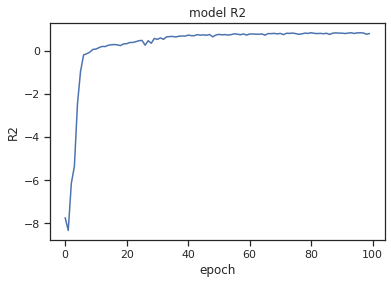

In [51]:
# summarize history for accuracy
plt.plot(history.history['my_coeffDetermination'])
plt.title('model R2')
plt.ylabel('R2')
plt.xlabel('epoch')
plt.show()


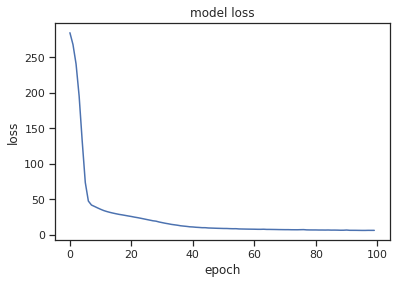

In [52]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()